## Comment exécuter son code en Python ?
1. En écrivant un fichier `.py` et en l'exécutant depuis le terminal.
2. En tappant directement ses commandes dans la console
3. En utilisant un IDE/Editeur de texte et en exécutant tout un fichier
4. En utilisant un IDE/Edt et en exécutant des portions de code
5. En utilisant des notebooks jupyter et en exécutant des cellules séparément

En créant un binder :
  - En ligne en utilisant [mybinder.org](mybinder.org/) et en pointant vers un repo github --> facile
  - En local en utilisant repo2docker --> pas très dur (non conseillé pour de la mise en production).

### Quel Python j'exécute ?

In [1]:
import sys

print(sys.executable)

/srv/conda/envs/notebook/bin/python


In [2]:
import sys

In [3]:
sys.implementation

namespace(name='cpython',
          cache_tag='cpython-37',
          version=sys.version_info(major=3, minor=7, micro=12, releaselevel='final', serial=0),
          hexversion=50793712,
          _multiarch='x86_64-linux-gnu')

### D'où vient un kernel lancé par jupyter ?

In [4]:
sys.argv

['/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py',
 '-f',
 '/home/adrienpacifico/.local/share/jupyter/runtime/kernel-2ab9cd1d-1c4e-4288-b270-3c3686f3fbb6.json']

In [5]:
ipykernel_launcher_path = sys.argv[0]

In [6]:
file_o=open(ipykernel_launcher_path) 
content=file_o.read()
print(content)                     

"""Entry point for launching an IPython kernel.

This is separate from the ipykernel package so we can avoid doing imports until
after removing the cwd from sys.path.
"""

import sys

if __name__ == '__main__':
    # Remove the CWD from sys.path while we load stuff.
    # This is added back by InteractiveShellApp.init_path()
    if sys.path[0] == '':
        del sys.path[0]

    from ipykernel import kernelapp as app
    app.launch_new_instance()



In [7]:
file_o=open(sys.argv[2]) 
content=file_o.read()
print(content)                     

{
  "shell_port": 37179,
  "iopub_port": 39983,
  "stdin_port": 57513,
  "control_port": 41233,
  "hb_port": 42871,
  "ip": "127.0.0.1",
  "key": "80728116-5c9394892b4d4f890befe0c3",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}


### Installer une librairie

#### Dans un environement virtuel

Aller dans la console dans son environnement virtuel et lancer la commande

`pip -m install nom_du_package`

Pourquoi `-m` la réponse est ici (surtout si vous êtes sous Windows) : https://snarky.ca/why-you-should-use-python-m-pip/

In [8]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">I learned sometime ago that we should be doing<br>`python -m pip install ...` instead of simply `pip install ...` but now I can&#39;t remember the source of this information. Likely from <a href="https://twitter.com/brettsky?ref_src=twsrc%5Etfw">@brettsky</a> or <a href="https://twitter.com/zooba?ref_src=twsrc%5Etfw">@zooba</a>, any of you have a talk/blog post on this, so I can share with people?</p>&mdash; Mariatta 🤦 (@mariatta) <a href="https://twitter.com/mariatta/status/1189243515739561985?ref_src=twsrc%5Etfw">October 29, 2019</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

#### Directement dans un jupyter notebook (qui va utiliser l'environement virtuel du Kernel)

In [9]:
%pip install u8darts

  Using cached u8darts-0.18.0-py3-none-any.whl (359 kB)
     |████████████████████████████████| 78 kB 1.5 MB/s             
  Using cached statsmodels-0.13.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)
  Using cached xarray-0.20.2-py3-none-any.whl (845 kB)
  Using cached holidays-0.13-py3-none-any.whl (172 kB)
  Using cached scipy-1.7.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (38.1 MB)
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Using cached lightgbm-3.3.2-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Using cached nfoursid-1.0.0-py3-none-any.whl (16 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached hijri_converter-2.2.3-py3-none-any.whl (14 kB)
  Using cached korean_lunar_calendar-0.2.1-py3-none-any.whl (8.0 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached patsy-0.5.2-py2.py3-n

In [10]:
import darts

#### Si on utilise conda/mini-conda (c'est le cas ici):
[Documentations officielle](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-pkgs.html)

1- Essayer d'installer via la commande `conda install nom_du_package`
2- Si le package n'existe pas, essayer de voir s'il existe via conda-forge
3- Si le package n'est pas soutenu sur conda forge, l'installer via `pip install nom_du_package`
4- Si le package n'est pas sur pypy 

#### Si le package n'est pas dispnible via `pip install nom_du_package` (le package n'est pas sur PyPI -- The Python Package Index):
1. Si le package est sur github/gitlab/autre (et qu'il y a un `setup.py` ou un `pyproject.toml`), on peut soit:
    1. Le cloner (git clone), se mettre dans le dossier puis faire `pip install -e .`
    2. Ou directement via pip:  `pip install git+https://github.com/tangentlabs/django-oscar-paypal.git@issue/34/oscar-0.6` (attention crée un dossier `src` dans le dossier d'où vous exécutez la commande)

### Obtenir de l'aide sur un package

In [11]:
%pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas

In [13]:
help(pandas)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data.
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic an

### Ipython

Tutoriel Ipython : https://github.com/ipython/ipython-in-depth/tree/7e5ce96cc9251083979efdfc393425f1229a4a68

Ipython vient avec des commandes magiques !

The IPyhton 'magic' functions are a set of commands, invoked by prepending one or two `%` signs to their name, that live in a namespace separate from your normal Python variables and provide a more command-like interface.  They take flags with `--` and arguments without quotes, parentheses or commas. The motivation behind this system is two-fold:
    
- To provide an orthogonal namespace for controlling IPython itself and exposing other system-oriented functionality.

- To expose a calling mode that requires minimal verbosity and typing while working interactively.  Thus the inspiration taken from the classic Unix shell style for commands.

In [14]:
?


IPython -- An enhanced Interactive Python

IPython offers a fully compatible replacement for the standard Python
interpreter, with convenient shell features, special commands, command
history mechanism and output results caching.

At your system command line, type 'ipython -h' to see the command line
options available. This document only describes interactive features.

GETTING HELP
------------

Within IPython you have various way to access help:

  ?         -> Introduction and overview of IPython's features (this screen).
  object?   -> Details about 'object'.
  object??  -> More detailed, verbose information about 'object'.
  %quickref -> Quick reference of all IPython specific syntax and magics.
  help      -> Access Python's own help system.

If you are in terminal IPython you can quit this screen by pressing `q`.


MAIN FEATURES
-------------

* Access to the standard Python help with object docstrings and the Python
  manuals. Simply type 'help' (no quotes) to invoke it.

* Ma

In [15]:
%quickref


IPython -- An enhanced Interactive Python - Quick Reference Card

obj?, obj??      : Get help, or more help for object (also works as
                   ?obj, ??obj).
?foo.*abc*       : List names in 'foo' containing 'abc' in them.
%magic           : Information about IPython's 'magic' % functions.

Magic functions are prefixed by % or %%, and typically take their arguments
without parentheses, quotes or even commas for convenience.  Line magics take a
single % and cell magics are prefixed with two %%.

Example magic function calls:

%alias d ls -F   : 'd' is now an alias for 'ls -F'
alias d ls -F    : Works if 'alias' not a python name
alist = %alias   : Get list of aliases to 'alist'
cd /usr/share    : Obvious. cd -<tab> to choose from visited dirs.
%cd??            : See help AND source for magic %cd
%timeit x=10     : time the 'x=10' statement with high precision.
%%timeit x=2**100
x**100           : time 'x**100' with a setup of 'x=2**100'; setup code is not
                   co

`%%time` va permettre de savoir en combien de temps s'exécute une commande

In [16]:
%%time
for a in range(10**7):
    a*3
    

CPU times: user 570 ms, sys: 4.85 ms, total: 574 ms
Wall time: 577 ms


`%%timeit` va permettre de savoir en combien de temps en moyenne une commande s'exécute.

In [17]:
%%timeit
for a in range(10**7):
    a*3
    

344 ms ± 9.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Executer une commande shell

`!` permet d'excuter des commandes du shell

In [18]:
!pwd

/home/adrienpacifico/python


In [19]:
!ls

0-Mettre_en_place_son_environnement_jupyter.ipynb
1-python_introduction.ipynb
2-zen_of_python.ipynb
3-load_modules.ipynb
4-Functions.ipynb
5-View_vs_copy.ipynb
6-assert_et_try_except.ipynb
7-os.ipynb
8-booléen_et_operateurs.ipynb
999-exporter_son_environnement
data
Introduction.ipynb
print_hello.txt


In [20]:
!sudo apt-get install ping

/bin/bash: sudo: command not found


In [ ]:
!ping google.com

PING google.com (216.58.214.174) 56(84) bytes of data.
64 bytes from mad01s26-in-f174.1e100.net (216.58.214.174): icmp_seq=1 ttl=107 time=39.9 ms
64 bytes from mad01s26-in-f174.1e100.net (216.58.214.174): icmp_seq=2 ttl=107 time=258 ms
64 bytes from mad01s26-in-f174.1e100.net (216.58.214.174): icmp_seq=3 ttl=107 time=49.1 ms
64 bytes from mad01s26-in-f174.1e100.net (216.58.214.174): icmp_seq=4 ttl=107 time=46.8 ms
64 bytes from mad01s26-in-f174.1e100.net (216.58.214.174): icmp_seq=5 ttl=107 time=177 ms
64 bytes from mad01s26-in-f174.1e100.net (216.58.214.174): icmp_seq=6 ttl=107 time=34.4 ms
64 bytes from mad01s26-in-f174.1e100.net (216.58.214.174): icmp_seq=7 ttl=107 time=266 ms
64 bytes from mad01s26-in-f174.1e100.net (216.58.214.174): icmp_seq=8 ttl=107 time=54.2 ms
64 bytes from mad01s26-in-f174.1e100.net (216.58.214.174): icmp_seq=9 ttl=107 time=50.9 ms
64 bytes from mad01s26-in-f174.1e100.net (216.58.214.174): icmp_seq=10 ttl=107 time=57.6 ms
64 bytes from mad01s26-in-f174.1e100.

In [ ]:
! ipconfig

La commande `?`

In [ ]:
?

In [ ]:
import time

In [ ]:
time?

In [ ]:
time.daylight?

In [ ]:
time.daylight

In [ ]:
time.daylight()

#### Output history

In [ ]:
2+10

In [ ]:
_ + 5

In [ ]:
"coucou"

In [ ]:
_

In [ ]:
%history -n 1-5

In [ ]:
_i

In [ ]:
_

In [ ]:
%magic

In [ ]:
%env

### Le debugger (ipdb)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot([1,2,4,6], [1,4,5,2])

In [ ]:
plt.plot([1,2,4,6], [1,4,5,2, 8], )

In [ ]:
%debug

In [ ]:
import pdb

In [ ]:
pdb.set_trace()

### La pep8, le style et les linter 

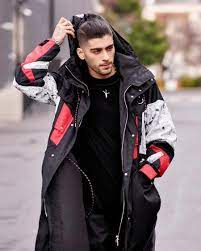

Pour que le code fonctionne, il faut que la *syntaxe* de python soit respectée.  
Pour qu'il soit facilement lisible entre personnes différentes, il est bien de respecter certaines règles de style.

La règle officielle est la [pep8](https://peps.python.org/pep-0008/) : [PEP 8 – Style Guide for Python Code](https://peps.python.org/pep-0008/)



![image.png](attachment:444a4c58-bda9-455b-b95c-5d132e4f5ce8.png)

In [ ]:
# Wrong:
# operators sit far away from their operands
income = (
    gross_wages
    + taxable_interest
    + (dividends - qualified_dividends)
    - ira_deduction
    - student_loan_interest
)

Il est possible d'activer des linter pour indiquer si le style ou la syntaxe est correcte dans les différents IDE.

Sous Jupyter, il n'y a pas de bon linter de disponible pour repérer facilement les erreurs (à part en utilisant [jupyterlab-lsp](https://github.com/jupyter-lsp/jupyterlab-lsp) mais qui a tendance à ralentir parfois fortement les notebooks).

Pour respecter le style on peut aussi utiliser des code formatter comme autopep8 ou black.

Enfin pour peut utiliser des outils *d'analyse statique de code* qui vont nous indiquer des erreurs de syntaxe, de style, ou des mauvaises pratiques.

Un exemple pylint permet de noter votre code !

Tous ces outils s'appliquent généralement à des fichiers `.py` mais depuis peu, la librairie `nbqa` permet d'appliquer ceci aux notebooks également !

In [ ]:
!pylint 1-python_introduction.ipynb

In [ ]:
!nbqa flake8 1-python_introduction.ipynb

In [ ]:
%pip install flake8